###**최소제곱법**

In [14]:
# 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import normal

In [15]:
# 상수
N = 10 # 관측점/관측값 개수 {(x_n, t_n)} (n=1,...,N)
Ms = [0,1,3,9] # 최소제곱법 다항식 차수 리스트

In [3]:
# 최소제곱법에 사용할 "램덤" 데이터 셋 생성 함수
# N개의 관측점/관측값 {(x_n, y_n)}을 포함하는 DataFrame 생성하여 반환
def create_dataset(N):
    dataset = pd.DataFrame(columns=['x','t'])
    for i in range(N):
        x = float(i)/float(N-1)
        t = np.sin(2*np.pi*x) + normal(scale = 0.3)
            # scale은 standard deviation.
        dataset = dataset.append(pd.Series([x,t],index=['x','t']),  
                                 ignore_index = True)                 
            # pandas.DataFrame.append(): 새로운 객체 반환. index가 0,1,...
    return dataset

In [4]:
# 트레이닝 데이터 셋 생성
training_set = create_dataset(N) # 위에서 정의한 관측점/관측값 개수 N  
  
# N개의 관측점/관측값 가지는 트레이닝 셋 DataFrame 출력
training_set

,x,t
0,0.000000,0.343506
1,0.111111,0.961925
2,0.222222,1.592594
3,0.333333,0.610823
4,0.444444,0.904985
5,0.555556,-0.492981
6,0.666667,-0.899071
7,0.777778,-0.887879
8,0.888889,-0.702401
9,1.000000,-0.238711


Text(0.5, 1.0, 'training set')

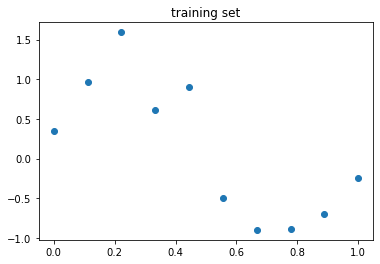

In [5]:
# 트레이닝 셋 그래프 출력
x = training_set['x'] # x는 pandas.core.series.Series 객체. 
t = training_set['t'] # t는 pandas.core.series.Series 객체. 

plt.scatter(x,t)
plt.title('training set')

In [6]:
# 최소제곱법으로 다항식 계수 계산

M = 4 # 우선 다항식 차수 M=2 (N=10)
# w: (M+1,1)=(3,1) matrix
# phi: (N,M+1)=(10,3) matrix

t = training_set.t # {t}: (N,1) 측정값 벡터
phi = pd.DataFrame()

for i in range(0,M+1): # 0,1,2 (M=2) 
    p = training_set.x**i
    p.name="x**%d" % i 
    phi = pd.concat([phi,p], axis=1) # phi matrix에 column (axis=1) p 추가. 

print("phi is " + str(phi.shape) + " matrix.")
print(phi)
print("\n")
print("t is " + str(t.shape) + " matrix")
print(t)

tmp = np.linalg.inv(np.dot(phi.T, phi)) # tmp = inv(phiT * phi)
w = np.dot(np.dot(tmp, phi.T), t) # w = inv(phiT * phi) * phiT * t

print("\nw is " + str(w.shape) + " matrix")
print(w)

phi is (10, 5) matrix.
   x**0      x**1      x**2      x**3      x**4
0   1.0  0.000000  0.000000  0.000000  0.000000
1   1.0  0.111111  0.012346  0.001372  0.000152
2   1.0  0.222222  0.049383  0.010974  0.002439
3   1.0  0.333333  0.111111  0.037037  0.012346
4   1.0  0.444444  0.197531  0.087791  0.039018
5   1.0  0.555556  0.308642  0.171468  0.095260
6   1.0  0.666667  0.444444  0.296296  0.197531
7   1.0  0.777778  0.604938  0.470508  0.365950
8   1.0  0.888889  0.790123  0.702332  0.624295
9   1.0  1.000000  1.000000  1.000000  1.000000


t is (10,) matrix
0    0.343506
1    0.961925
2    1.592594
3    0.610823
4    0.904985
5   -0.492981
6   -0.899071
7   -0.887879
8   -0.702401
9   -0.238711
Name: t, dtype: float64

w is (5,) matrix
[  0.27556334  12.39529808 -42.83343447  38.82184494  -8.8436611 ]


In [7]:
# 최소제곱법으로 N차 다항식 계수 계산 및 다항식 함수 반환하는 함수

# w: (M+1,1) matrix. 다항식 계수 벡터.
# phi: (N,M+1) matrix. 측정점 매트릭스.
# wT * phiT * phi - tT * phi = 0
# w = inv(phiT * phi) * phiT * t
def calc_polynomial(dataset, M):
    t = dataset.t # t: pandas.core.series.Series
    phi = pd.DataFrame()
    
    for i in range(0,M+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi)) # tmp: numpy.ndarray
    ws = np.dot(np.dot(tmp, phi.T), t) # ws: numpy.ndarray

    # 다항식 근사 계산 함수
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return (f, ws)

In [8]:
# 다항식 차수에 따른 다항식 계수 계산
df_ws = pd.DataFrame()

for _, M in enumerate(range(0,N)): # 0,...,9
    f, ws = calc_polynomial(training_set, M) # N개의 트레이닝 셋으로부터 M차 다항식 계산 
    df_ws = df_ws.append(pd.Series(ws,name="M=%d" % M)) # append a row. 

# 데이터 프레임 각 셀의 값을 소수점 둘째 자리까지 표시
pd.options.display.float_format = "{:,.2f}".format
print("Table of the coefficients")
df_ws

Table of the coefficients


,0,1,2,3,4,5,6,7,8,9
M=0,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M=1,1.08,-1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M=2,1.06,-1.82,-0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M=3,0.33,10.21,-31.81,21.13,NaN,NaN,NaN,NaN,NaN,NaN
M=4,0.28,12.40,-42.83,38.82,-8.84,NaN,NaN,NaN,NaN,NaN
M=5,0.33,7.02,1.97,-87.82,136.32,-58.06,NaN,NaN,NaN,NaN
M=6,0.33,7.65,-5.79,-54.41,71.75,-0.63,-19.14,NaN,NaN,NaN
M=7,0.33,8.10,-13.30,-9.87,-54.19,183.02,-152.42,38.08,NaN,NaN
M=8,0.34,-57.51,"1,309.90","-9,990.22","37,596.13","-78,201.32","91,295.98","-55,950.74","13,997.21",NaN
M=9,0.34,-323.63,"7,456.91","-65,358.91","297,712.29","-786,858.11","1,251,684.23","-1,181,460.27","609,476.00","-132,329.09"


In [9]:
# 제곱근 평균 제곱 오차(Root mean square error) 계산 
def calc_rms_error(dataset, f):
    err = 0.0
    # x value: line.x  t value: line.t
    for _, line in dataset.iterrows(): # (index, Series) pairs.
        x, t = line.x, line.t
        err += 0.5 * (t - f(x))**2
    return np.sqrt(2 * err / len(dataset))

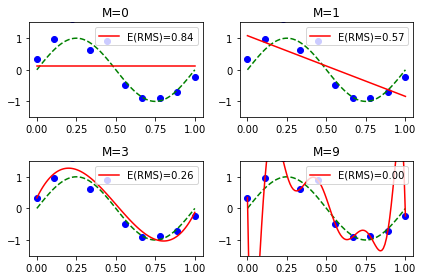

In [10]:
# 최소제곱법으로 구한 0, 1, 3, 9차 다항식 시각화
fig = plt.figure()

for c, M in enumerate(Ms):
    f, ws = calc_polynomial(training_set, M)
    rms_error = calc_rms_error(training_set,f)

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % M)

    # 트레이닝 셋 표시
    subplot.scatter(training_set.x, training_set.t, marker='o', color='blue')

    # sin 곡선 표시
    linex = np.linspace(0,1,101) # numpy.ndarray (101,)
    liney = np.sin(2*np.pi*linex) # numpy.ndarray (101,)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 다항식 근사 곡선 표시
    linex = np.linspace(0,1,101) 
    liney = f(linex)
    
    # error값 표시
    label = "E(RMS)=%.2f" % rms_error
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)

fig.tight_layout()

<AxesSubplot:title={'center':'RMS Error'}>

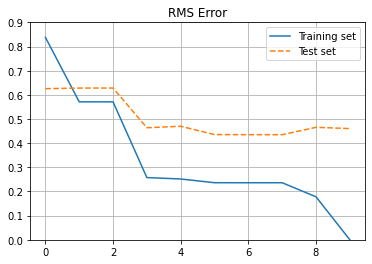

In [11]:
# 트레이닝 셋과 테스트 셋에 대한 오차의 변화 시각화
test_set = create_dataset(N)
df = pd.DataFrame(columns=['Training set','Test set'])
for M in range(0,10):
    f, ws = calc_polynomial(training_set, M)
    train_error = calc_rms_error(training_set, f)
    test_error = calc_rms_error(test_set, f)
    df = df.append(
            pd.Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))

In [12]:
# 라이브러리 numpy의 polyfit을 사용하여 최소제곱법 계산

# numpy.polyfit(x, y, deg)
# Input: trainset, M = 2
# Output: [w2, w1, w0]
w_polyfit= np.polyfit(training_set.x, training_set.t, 2)
print(w_polyfit)

[-0.10436923 -1.8167355   1.0643693 ]


In [13]:
# w_polyfit으로 추정값 계산하기
def f(x, w):
    y = 0
    for i, w_i in enumerate(w):
        deg = len(w) - (i + 1)
        y += w_i * (x ** deg)
    return y

f(0,w_polyfit)

1.0643693027605077